# Multi-Modal Data Fusion - Project Work: Multi-Modal Physical Exercise Classification


In this project, real multi-modal data is studied by utilizing different techniques presented during the course. In addition, there is an optional task to try some different approaches to identify persons from the same dataset. Open MEx dataset from UCI machine learning repository is used. Idea is to apply different techniques to recognize physical exercises from wearable sensors and depth camera, user-independently.

## Author(s)
Add your information here

Name(s): SOFEEM NASIM

Student number(s): 1.2.246.562.24.71197488988

## Description 

The goal of this project is to develop user-independent pre-processing and classification models to recognize 7 different physical exercises measured by accelerometer (attached to subject's thigh) and depth camera (above the subject facing downwards recording an aerial view). All the exercises were performed subject lying down on the mat. Original dataset have also another acceleration sensor and pressure-sensitive mat, but those two modalities are ommited in this project. There are totally 30 subjects in the original dataset, and in this work subset of 10 person is utilized. Detailed description of the dataset and original data can be access in [MEx dataset @ UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/MEx#). We are providing the subset of dataset in Moodle.

The project work is divided on following phases:

1. Data preparation, exploration, and visualization
2. Feature extraction and unimodal fusion for classification
3. Feature extraction and feature-level fusion for multimodal classification
4. Decision-level fusion for multimodal classification
5. Bonus task: Multimodal biometric identification of persons

where 1-4 are compulsory (max. 10 points each), and 5 is optional to get bonus points (max. 5+5 points). In each phase, you should visualize and analyse the results and document the work and findings properly by text blocks and figures between the code. <b> Nice looking </b> and <b> informative </b> notebook representing your results and analysis will be part of the grading in addition to actual implementation.

The results are validated using confusion matrices and F1 scores. F1 macro score is given as 
<br>
<br>
$
\begin{equation}
F1_{macro} = \frac{1}{N} \sum_i^N F1_i,
\end{equation}
$
<br>
<br>
where $F1_i = 2  \frac{precision_i * recall_i}{precision_i + recall_i}$, and $N$ is the number of classes.
<br>

## Learning goals 

After the project work, you should  

- be able to study real world multi-modal data
- be able to apply different data fusion techniques to real-world problem
- be able to evaluate the results
- be able to analyse the outcome
- be able to document your work properly

## Relevant lectures

Lectures 1-8

## Relevant exercises

Exercises 0-6

## Relevant chapters in course book

Chapter 1-14

## Additional Material 

* Original dataset [MEx dataset @ UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/MEx#)
* Related scientific article [MEx: Multi-modal Exercises Dataset for Human Activity Recognition](https://arxiv.org/pdf/1908.08992.pdf)

# 1. Data preparation, exploration, and visualization

<a id='task1'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 1.</b>

Download data from the Moodle's Project section. Get yourself familiar with the folder structure and data. You can read the data files using the function given below. Each file consists one exercise type performed by single user. Data are divided on multiple folders. Note that, in each folder there is one long sequence of single exercise, except exercise 4 which is performed two times in different ways. Those two sequences belongs to same class. Do the following subtasks to pre-analyse data examples and to prepare the training and testing data for next tasks:
<br>
<br> 
<p> Read raw data from the files. Prepare and divide each data file to shorter sequences using windowing method. Similar to related article "MEx: Multi-modal Exercises Dataset for Human Activity Recognition", use 5 second window and 3 second overlapping between windows, producing several example sequences from one exercise file for classification purposes. Windowing is working so that starting from the beginning of each long exercise sequence, take 5 seconds of data points (from synchronized acceleration data and depth images) based on the time stamps. Next, move the window 2 seconds forward and take another 5 seconds of data. Then continue this until your are at the end of sequence. Each window will consists 500x3 matrix of acceleration data and 5x192 matrix of depth image data.</p>
<br>  
<p> <b>1.1</b> Plot few examples of prepared data for each modalities (accelometer and depth camera). Plot acceleration sensor as multi-dimensional time-series and depth camera data as 2D image. Plot 5 second acceleration sensor and depth image sequences of person 1 and 5 performing exercises 2, 5, and 6. Take the first windowed example from the long exercise sequence. </p>
<br>
<p> <b>1.2</b> Split the prepared dataset to training and testing datasets so that data of persons 1-7 are used for training and data of persons 8-10 are used for testing. In next tasks, training dataset could be further divided on (multiple) validation data folds to tune the models parameters, when needed.<br>
    
<p> Note: Training set should have 1486 windows and testing set should have 598 windows. In training set, acceleration data will have a window without a pair with depth camera data, that window should be dropped as it doesn't have a pair.<p>
    
    
    
    
Document your work, calculate the indicator statistics of training and testing datasets (number of examples, dimensions of each example) and visualize prepared examples.

</div>

In [2]:
# Import relevant libraries here
from pathlib import Path
from copy import deepcopy
import numpy as np
import pandas as pd

# Enter data folder location
loc = "./MEx"

In [3]:
def path_to_meta(p):
    meta = dict()
    meta["subject_id"] = p.parent.stem
    meta["exercise_id"] = p.stem.split("_")[-2]
    meta["trial"] = int(p.stem.split("_")[-1])
    meta["sensor_code"] = p.stem.split("_")[0]
    meta["sensor"] = {"act": "acc", "dc": "dc"}[meta["sensor_code"]]
    return meta

# Find, read, and compose the measurements
paths_record = Path(loc).glob("*/*/*.csv")

records = []

for path_record in paths_record:
    df = pd.read_csv(path_record, delimiter=",", header=None)
    meta = path_to_meta(path_record)
    
    if meta["sensor"] == "acc":
        col_names = ["time", "acc_0", "acc_1", "acc_2"]
        df.columns = col_names
    else:
        num_cols = df.shape[1]
        col_names = ["time", ] + [f"dc_{i}" for i in range(num_cols-1)]
        df.columns = col_names

    meta["df"] = df
    
    records.append(meta)

df_records = pd.DataFrame.from_records(records)

print(len(df_records))
print(f"Total records found: {len(df_records)}")
print("Dataframe with all records:")
display(df_records.head())
print("Dataframe with one measurement series:")
display(df_records["df"].iloc[0].head())

160
Total records found: 160
Dataframe with all records:


,subject_id,exercise_id,trial,sensor_code,sensor,df
0,01,01,1,act,acc,time acc_0 acc_1 acc_2 0 ...
1,01,02,1,act,acc,time acc_0 acc_1 acc_2 0 ...
2,01,03,1,act,acc,time acc_0 acc_1 acc_2 0 ...
3,01,04,1,act,acc,time acc_0 acc_1 acc_2 0 ...
4,01,04,2,act,acc,time acc_0 acc_1 acc_2 0 ...


Dataframe with one measurement series:


,time,acc_0,acc_1,acc_2
0,0.0,-0.515625,-0.843750,-0.131944
1,10.0,-0.515625,-0.853125,-0.134375
2,20.0,-0.515625,-0.850000,-0.140625
3,30.0,-0.515625,-0.862500,-0.150000
4,40.0,-0.525000,-0.856250,-0.156250


In [4]:
# Extract 5-second long windows with 2-second shift (3-second overlap)

#This fuction finds the index of acc with is not paired with dc 
def findindex(acc, dc):
    acc = acc.drop(['df'], axis=1)
    dc = dc.drop(['df'], axis=1)
    df = pd.merge(acc,dc, on=['subject_id', 'exercise_id', 'window_idx', 'trial'], copy = False, how='outer')
    index = np.where(df['sensor_code_y'].isna())
    print(index)
    return index
    
    
    
records_windowed = []

time_window = 5000.
time_offset = 2000.
    
for row_idx, row_data in df_records.iterrows():
    df_tmp = row_data["df"]
    time_start = np.min(df_tmp["time"].to_numpy())
    time_end = np.max(df_tmp["time"].to_numpy())
    
    for window_idx, t0 in enumerate(np.arange(time_start, time_end, time_offset)):
        t1 = t0 + time_window
        # Handle boundary conditions - skip the measurements from the end shorter than window size
        if t1 > time_end:
            continue
        
        tmp_data = deepcopy(row_data)
        tmp_data["window_idx"] = window_idx
        tmp_data["df"] = df_tmp[(df_tmp["time"] >= t0) &
                                (df_tmp["time"] < t1)].copy()
        
        records_windowed.append(tmp_data)
        
df_records_windowed = pd.DataFrame.from_records(records_windowed)

print(f"Total windows extracted: {len(df_records_windowed)}")
print("Dataframe with all windowed records:")
display(df_records_windowed.head())
print("Dataframe with one windowed measurement series:")
display(df_records_windowed["df"].iloc[0])
acc = df_records_windowed[(df_records_windowed["sensor_code"] == 'act')]
dc = df_records_windowed[(df_records_windowed["sensor_code"] == 'dc')]


#with the index where pair of acc not concede with 
ind = findindex(acc, dc)
#print(ind)



print(df_records_windowed.shape)
print(df_records_windowed['subject_id'].unique())

#display(df_records_windowed["df"].iloc[407])
df_records_windowed = df_records_windowed.drop(df_records_windowed.index[ind])
print(f"Total windows extracted: {len(df_records_windowed)}")

print("length after removing unpaired acc",len(df_records_windowed[(df_records_windowed["sensor_code"] == 'act')]))
print("length of dc" , len(df_records_windowed[(df_records_windowed["sensor_code"] == 'dc')]))



#print(len(df_records_windowed))

Total windows extracted: 4169
Dataframe with all windowed records:


,subject_id,exercise_id,trial,sensor_code,sensor,df,window_idx
0,01,01,1,act,acc,time acc_0 acc_1 acc_2 0 ...,0
1,01,01,1,act,acc,time acc_0 acc_1 acc_2 200 ...,1
2,01,01,1,act,acc,time acc_0 acc_1 acc_2 400 ...,2
3,01,01,1,act,acc,time acc_0 acc_1 acc_2 60...,3
4,01,01,1,act,acc,time acc_0 acc_1 acc_2 80...,4


Dataframe with one windowed measurement series:


,time,acc_0,acc_1,acc_2
0,0.0,-0.515625,-0.843750,-0.131944
1,10.0,-0.515625,-0.853125,-0.134375
2,20.0,-0.515625,-0.850000,-0.140625
3,30.0,-0.515625,-0.862500,-0.150000
4,40.0,-0.525000,-0.856250,-0.156250
...,...,...,...,...
495,4950.0,-0.578125,-0.593750,0.515625
496,4960.0,-0.578125,-0.593750,0.509375
497,4970.0,-0.578125,-0.600000,0.500000
498,4980.0,-0.578125,-0.615625,0.493750


(array([407], dtype=int64),)
(4169, 7)
['01' '02' '03' '04' '05' '06' '07' '08' '09' '10']
Total windows extracted: 4168
length after removing unpaired acc 2084
length of dc 2084


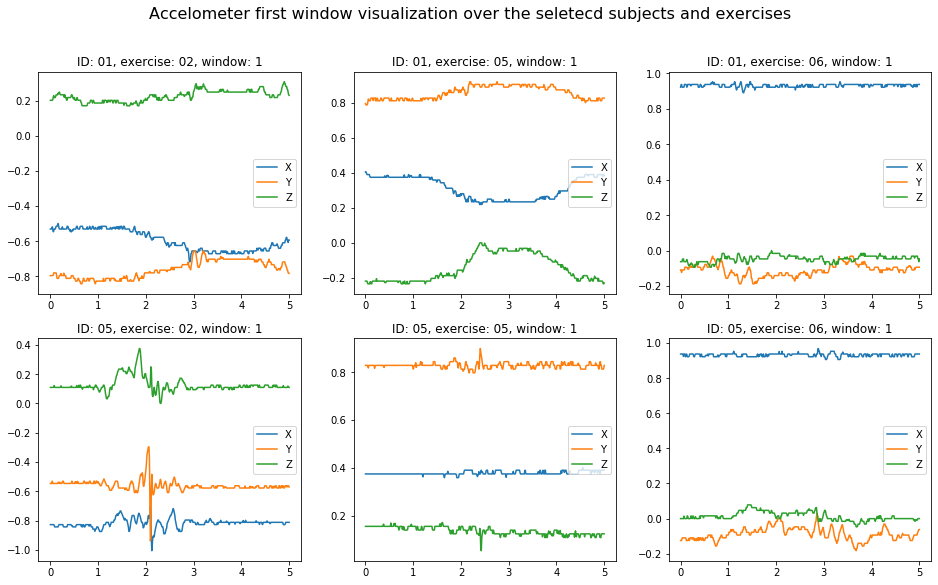

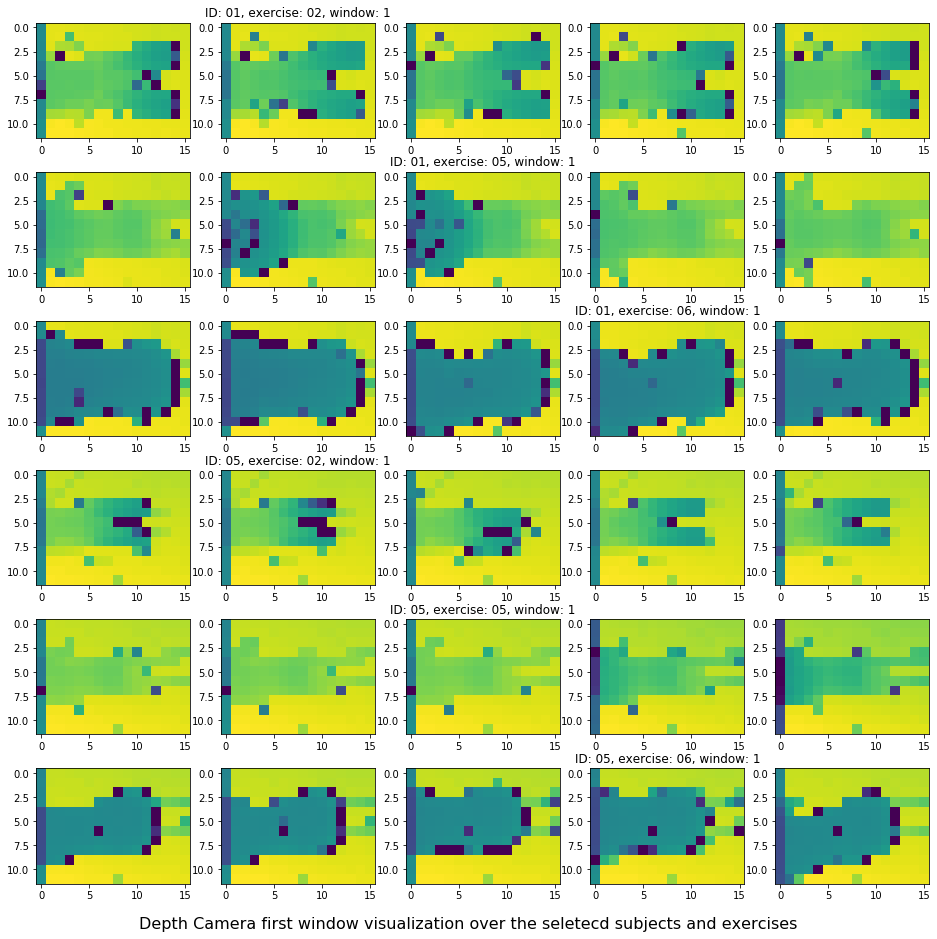

In [5]:
# 1.1. Visualize selected samples for both modalities
import matplotlib.pyplot as plt
### Your code begins here ###
# Visualizing the window data for person 1, 5 for excersice 2,5 and 6. 
### The part is referred to Task 1.1: The following section Plot acceleration sensor as multi-dimensional time-series and 
### depth camera data as 2D image. The record are filter as subject id: 01 and 05, exercise id: 02, 05, and 06.

#Step 1: Intilal step: Interested parameters
subject_Ids = ['01','05'] # SUBJECT ID USED FOR VISUALIZATION 
axis_time_accsensor = np.linspace(0,5,5*100)  # SETTING TIME AXIS FOR ACCELOMETER SENSOR
plot_exercise = ['02','05','06'] # EXERCISE USED FOR VISUALIZATION 
rows = 0
fig, ax = plt.subplots(2, 3, figsize = (16,9))
fig2, ax1 = plt.subplots(6, 5, figsize = (16,16))
rowsdc = 0
fig.suptitle('Accelometer first window visualization over the seletecd subjects and exercises', fontsize=16)
fig2.suptitle('Depth Camera first window visualization over the seletecd subjects and exercises', fontsize=16, y=.1)

#Step 2: Process and plotting of requirement
# this loop go thorugh the interested subjects and exercise to plot the time series of x,y and z for first window
# Similarly,  it will plot 2D image from depth camera for first window. 
for s in subject_Ids: 
    cols = 0
    for ex in plot_exercise:
        #print("r", rows)
        #print("c", cols)
        filter_records = df_records_windowed[(df_records_windowed["subject_id"] == s) & 
                                  (df_records_windowed["exercise_id"] == ex)] # filter records based on subject id and exercise
        #print(len(filter_records))
        filter_sensortype_acc = filter_records[(filter_records["sensor"] == 'acc')] #filter accelometer sensor data 
        filter_sensortype_dc = filter_records[(filter_records["sensor"] == 'dc')] #filter depth_camera sensor data 
        
        
        filter_series = filter_sensortype_acc["df"].iloc[0] # filter accelometer data for first window
        filter_series_2 = filter_sensortype_dc["df"].iloc[0] # filter depth_camera data for first window
        filter_series_2 = filter_series_2.drop(['time'], axis=1) # drop extra column 
        
        # Plot the accelemoter values for x,y,and z in first window
        ax [rows, cols].plot(axis_time_accsensor,filter_series['acc_0'], label = "X") 
        ax [rows, cols].plot(axis_time_accsensor,filter_series['acc_1'],label = "Y")
        ax [rows, cols].plot(axis_time_accsensor,filter_series['acc_2'], label = "Z")
        ax[rows, cols].title.set_text("ID: %s, exercise: %s, window: %i"%(s,ex,1))
        ax[rows, cols].legend(loc='center right')
        cols += 1
        
        #fig2.title.set_text("Depth camera")
        
        # loop go through first window of depth camera and plots the depth camera values for first window (5 enteries)
        for index in range (0,5):
            #fig2.add_subplot(1,5,index+1)
            img = filter_series_2.iloc[index].values.reshape(-1,1) # reshape series to ndarray
            #print(img)
            img = img.reshape(12,16) # reshape to original image size
            ax1[rowsdc,index].imshow(img)
            
        ax1[rowsdc,cols].title.set_text("ID: %s, exercise: %s, window: %i"%(s,ex,1))
        rowsdc += 1
        
    rows += 1

### Your code ends here ###

Total Length of windows in Training set without depthcamera: 2972
length of windows in Testing set without depthcamera: 1196
-----------------------------------------------------------------------------------------------------
Dataset Name: Training Dataset
Total number of subject Ids: 7
Total number of exercises for Training Dataset : 7
Dimension of window in Accelerometer Dataset: (500, 4)
Total windows size of accelerometer Data for subjectID 01: 452
Total windows size of accelerometer Data for subjectID 03: 358
Total windows size of accelerometer Data for subjectID 05: 484
Dataset Name: Testing Dataset
Total number of subject Ids: 3
Total number of exercises for Testing Dataset : 7
Dimension of window in Accelerometer Dataset: (500, 4)
Total windows size of accelerometer Data for subjectID 08: 396
Total windows size of accelerometer Data for subjectID 10: 394
Kfold with fold: 2
TRAIN: [4 5 6] TEST: [0 1 2 3]
TRAIN: [0 1 2 3] TEST: [4 5 6]
Kfold with fold: 6
TRAIN: [2 3 4 5 6] TEST:

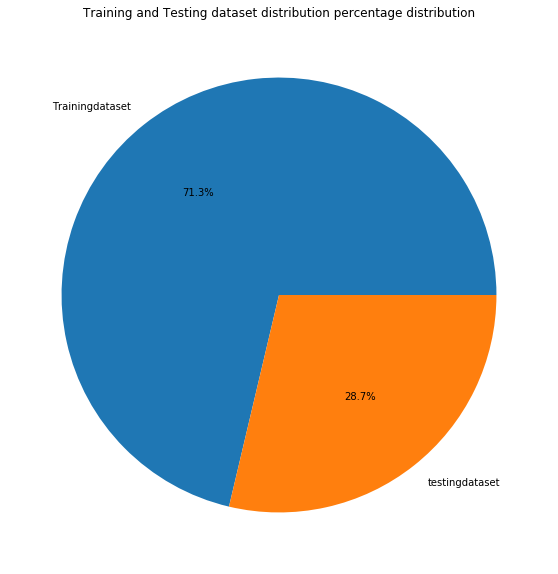

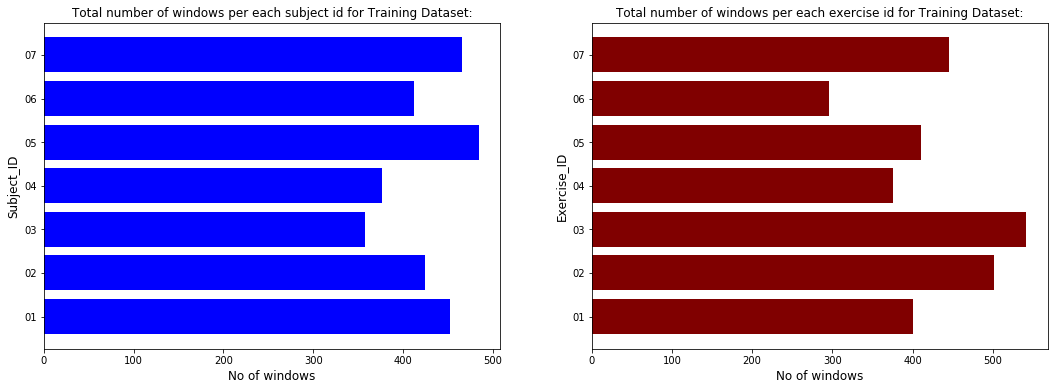

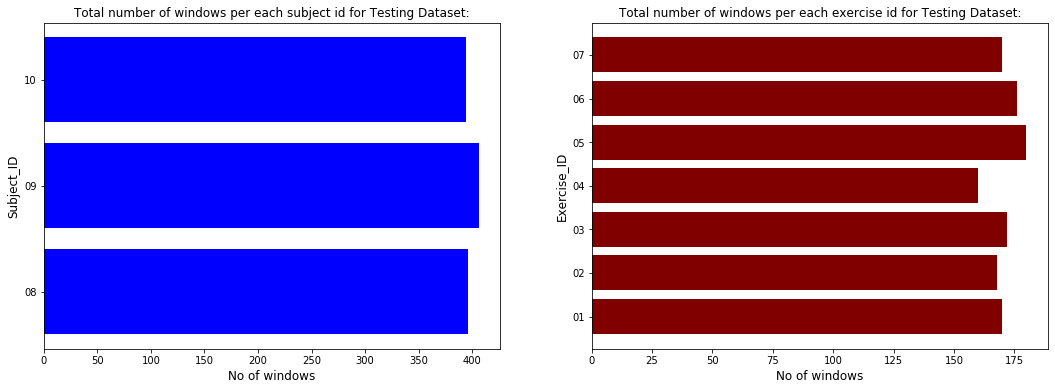

In [6]:
# 1.2. Split samples based on subject ID into training and testing datasets for futher experiments
from sklearn.model_selection import KFold

### Your code begins here ###

##performing the spliting of training set and testing subject id 01 to 07 to train dataset and testing dataset 08 to 10
##information on length of both training and testing set
###  ---------------------------------------------------------------------------------------------------------- ###
Training_dataset = df_records_windowed[df_records_windowed["subject_id"].isin(['01','02','03','04','05','06','07'])]
print("Total Length of windows in Training set without depthcamera: %i" %len(Training_dataset))
Testing_dataset = df_records_windowed[df_records_windowed["subject_id"].isin(['08','09','10'])]
print("length of windows in Testing set without depthcamera: %i" %len(Testing_dataset))
print("-----------------------------------------------------------------------------------------------------")
###  ---------------------------------------------------------------------------------------------------------- ###


###  ---------------------------------------------------------------------------------------------------------- ###
# Dimensionanddatasetinformation: indicator statistics on Training and tesing data (only including accelometer data)

## function Dimensionanddatasetinformation:
#   input:  dataset (training dataset or testing dataset) , name of dataset.   
##  This function: prints some of the information related to dimension of dataset 
#                  1) Dataset (Train or Test), total number of subject ID, total number of exercise Id and Acc dimensions
#                  2) Prints few examples (subset based on subject ID): information on total number of windows size in each 
#                     selected subset of subjects ID.

###  ---------------------------------------------------------------------------------------------------------- ###

# Print the dimension of training and testing dataset. 
def Dimensionanddatasetinformation(dataset, name):
    windows = []
    print("Dataset Name: %s"%(name))
    print("Total number of subject Ids: %i" %len(dataset['subject_id'].unique()))
    print("Total number of exercises for", name, ": %i" %len(dataset['exercise_id'].unique()))
    print("Dimension of window in Accelerometer Dataset:" , dataset["df"].iloc[0].shape) # the shape included the time axis
    
    if name == 'Training Dataset':
        examples = ['01','03','05']
    else:
        examples = ['08','10']
    
    for exam in examples:
        new = dataset[dataset['subject_id'] == exam]
        windows.append(len(new["window_idx"]))
        #print(windows)

    #fews examples of different subject ids ("01","03", "05" for training set and "08, "10" for testing set)
    
    for i in range (len(windows)):
        print("Total windows size of accelerometer Data for subjectID %s:" %examples[i], "%i" %windows[i])
        #print
    #print("-----------------------------------------------------------------------------------------------------")
###  ---------------------------------------------------------------------------------------------------------- ###
# ------------------------- End function------------------------------#

###  ---------------------------------------------------------------------------------------------------------- ###
# Datavisualization: data visualiztion tasks

## function Datavisualization:
#   input:  dataset (training dataset and testing dataset) 
##  This function: prints the pie chart of percentage distribution of training and testing dataset
#                  1) pie chart

###  ---------------------------------------------------------------------------------------------------------- ###

def Datavisualization(traindata,testdata):

    lengthdataset = [len(traindata),len(testdata)] # collects length of both datasets
    figure1 = plt.figure(figsize = (16,10))
    plt.pie(lengthdataset, labels = ['Trainingdataset', 'testingdataset'], autopct='%1.1f%%') # pie chart show percentage distribution
    plt.title("Training and Testing dataset distribution percentage distribution")
###  ---------------------------------------------------------------------------------------------------------- ###
# ------------------------- End function------------------------------#

##  ---------------------------------------------------------------------------------------------------------- ###
# DatavisualizationTrainingandTesting: data visualiztion tasks on prepared training and testing dataset

## function DatavisualizationTrainingandTesting:
#   input:  dataset (training dataset or testing dataset) , name of dataset. 
##  This function: information on windows per each exercise and subjects id of training and testing dataset
###  ---------------------------------------------------------------------------------------------------------- ###

def DatavisualizationTrainingandTesting(dataset, name):
    
    
    figure2 = plt.figure(figsize = (18, 6))
    subject_window_size = []
    exercise_window_size = []
    
    for swindow in dataset['subject_id'].unique():
        new = dataset[dataset['subject_id'] == swindow]
        subject_window_size.append(len(new["window_idx"]))
    
    for ewindow in dataset['exercise_id'].unique():
        new = dataset[dataset['exercise_id'] == ewindow]
        exercise_window_size.append(len(new["window_idx"]))  
    
    
    
    figure2.add_subplot(1,2,1)
    plt.barh(dataset['subject_id'].unique(), subject_window_size, color ='blue')
    plt.title("Total number of windows per each subject id for %s:" %name)
    plt.xlabel('No of windows', fontsize = 12)
    plt.ylabel('Subject_ID', fontsize = 12)
    
    
    figure2.add_subplot(1,2,2)
    plt.barh(dataset['exercise_id'].unique(), exercise_window_size, color ='maroon')
    plt.title("Total number of windows per each exercise id for %s:" %name)
    plt.xlabel('No of windows', fontsize = 12)
    plt.ylabel('Exercise_ID', fontsize = 12)
###  ---------------------------------------------------------------------------------------------------------- ###
# ------------------------- End function------------------------------#

##  ---------------------------------------------------------------------------------------------------------- ###
# Validationtrainingdataset: k-fold validation (task for --validation data folds to tune the models parameters)

## function Validationtrainingdataset:
#   input:  dataset (training dataset): 
##  This function: performs k-fold validation with 2 and 6 splits 
#                1) The index indicates the subject id which can shuffle during validation testing. 
###  ---------------------------------------------------------------------------------------------------------- ###


def Validationtrainingdataset(dataset):
    
    X = np.array(dataset['subject_id'].unique())
    y = np.array(dataset['subject_id'].unique())
    #print(y)
    nsplits = [2,6] # few examples of k-fold
    for k in nsplits:
        kf = KFold(n_splits=k)
        print("Kfold with fold: %i" %k)
        for train_index, test_index in kf.split(X):  
            print("TRAIN:", train_index, "TEST:", test_index) # print indexes of subject id for validation. 

###  ---------------------------------------------------------------------------------------------------------- ###
# ------------------------- End function------------------------------#

### Calling above defined function to show the output to fullfill tasks(1.2)
##-------------------------------------------------------------------------------###
Dimensionanddatasetinformation(Training_dataset, 'Training Dataset')
Dimensionanddatasetinformation(Testing_dataset, 'Testing Dataset')
Datavisualization(Training_dataset,Testing_dataset)
DatavisualizationTrainingandTesting(Training_dataset, 'Training Dataset')
DatavisualizationTrainingandTesting(Testing_dataset, 'Testing Dataset')
Validationtrainingdataset(Training_dataset)
##-------------------------------------------------------------------------------###

### Your code ends here ###

# 2. Feature extraction and fusion for unimodal classification

<a id='task2'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 2.</b>

Use the training dataset prepared in task 1. to build models based on the combination of principal component analysis (PCA), linear discriminant analysis (LDA), and nearest neighbour (NN) classifier for each modality separately and evaluate the model on test dataset. Do the subtasks given as
<br>
<br>
<p> <b>2.1</b> Calculate PCA and LDA transformations to reduce the dimensionality of accelerometer data (e.g., using scikit-learn implementations). Before transformations downsample data from 100 Hz to 25 Hz (using scipy.signal.resample) to get 125x3 matrix of data for each 5 sec window. You should also standardize the values to zero mean and unit variance before the transformations. Using training dataset, fit PCA with 5-dimensional subspace (i.e., choosing the 5 largest principal components) and fit LDA with 5-dimensional subspace. Transform both train and test examples to this low-dimensional feature representation. Concatenate each sequence to single vector size of 3x(5+5). Perform the fusion of PCA and LDA similar manner as presented in Lecture 3 (pages 24-25) using NN method. Evaluate the performance on testset. Show confusion matrix and F1 scores of the results. </p>
<br>
<p> <b>2.2</b> Use PCA and LDA transformations to reduce the dimensionality of depth images. You should also standardize the values to zero mean and unit variance before the transformations. Fit PCA and LDA for all training images (12x16, 192-dimensional in vectorized form) by choosing 5-dimensional subspace for both PCA and LDA. Transform both train and test examples to this low-dimensional feature representation. Concatenate each sequence to single vector size of 5x1x(5+5). Similar to task 2.1, do the PCA and LDA fusion using NN and evaluate the performance on testset. Show confusion matrix and F1 scores of the results. </p>
<br> 
Document your work, evaluate the results, and analyse the outcomes in each subtasks 2.1-2.2.
    
</div>

u (1486, 125, 3)
shape at each run/channel  0  pca:  (1486, 5)
shape at each run/channel  0 lda: (1486, 5)
shape at each run/channel  1  pca:  (1486, 10)
shape at each run/channel  1 lda: (1486, 10)
shape at each run/channel  2  pca:  (1486, 15)
shape at each run/channel  2 lda: (1486, 15)
shape at all channel vector: (1486, 30)
final shape (1486, 30)
len 3
shape at each run/channel  0  pca:  (598, 5)
shape at each run/channel  0 lda: (598, 5)
shape at each run/channel  1  pca:  (598, 10)
shape at each run/channel  1 lda: (598, 10)
shape at each run/channel  2  pca:  (598, 15)
shape at each run/channel  2 lda: (598, 15)
shape at all channel vector: (598, 30)
F1 score of prediction  NN method : 0.45936402641570234
-----------------------------------------------------------------
confusion Martix of NN method:
-----------------------------------------------------------------


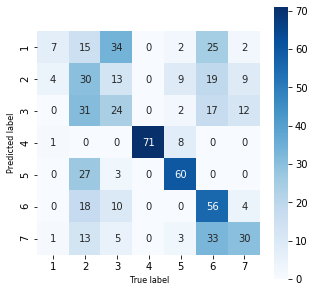

In [7]:
# 2.1 Calculate PCA and LDA transformations to reduce the dimensionality of accelerometer data and depth camera data. 
from scipy.signal import resample
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

### Your code begins here ###
#  !-- Common Function used for both Task 2.1 and 2.2 --!
###  ---------------------------------------------------------------------------------------------------------- ###
# PCA_LDA_transformationwithtraindataset5subspacecomp:

## function PCA_LDA_transformationwithtraindataset5subspacecomp:
#   input: training dataset (either for sensor acc or depth camera) , trian_labels.
#   returns: combined vector of pca and lda fit, pcas, ldas, means and standard deviations
#            (for accelometer: [matrix: 1487, 30] 5 pcas + 5 ldas of each 3 channels)
#            (for depth camera: [])
#   
##  This function: 1) performs the fitiing and transformation of training dataset for pca and lda
#                  2) Standardize and Scale to zero mean and unit variance
#                  3) Combines and conatenate each channel sequences to single 
#                  4) Conatenate all the channel to final vector of  acc:30 and depthcamera:50

###  ---------------------------------------------------------------------------------------------------------- ###
def PCA_LDA_transformationwithtraindataset5subspacecomp(data,labels):
    
    pcas = []
    ldas = []
    means = [] 
    stdDeviations = []
    #print(len(data.shape))
        
    #This loop will go through each channel of accelerometer data axes. 
    for channel in range (data.shape[2]):

        #Step 1: Standardization of data with zero mean and unit variance
            # Normalizatrion of overall dataset at each channel
            means.append(np.mean(data[:,:,channel], axis=0))
            stdDeviations.append(np.std(data[:,:,channel], axis=0))
            # Data in Normalizated: Standardization to zero mean and unit variance.  
            data[:,:,channel] = (data[:,:,channel] - means[channel][None,:]/stdDeviations[channel][None,:])
        
        #Step 2: Decompostion of dataset over each channel by applying PCA and LDA
            #Applying PCA decomposition on each Channel
            pca_decomposition = PCA(n_components=5)
            pcas.append(pca_decomposition)
            datafit_pcadecompostion = pca_decomposition.fit_transform(data[:,:,channel])
            
            #Applying LDA decomposition on each Channel
            lda_decompostion = LinearDiscriminantAnalysis(n_components=5)
            ldas.append(lda_decompostion)
            datafit_ldadecompostion = lda_decompostion.fit_transform(data[:,:,channel], labels)
            
            
        #Step 3: Combining pca and lda component over all 3 channels 
            if channel == 0:
                combinepcadata = datafit_pcadecompostion
                combineldadata = datafit_ldadecompostion
            else: 
                combinepcadata = np.concatenate((combinepcadata,datafit_pcadecompostion), axis = 1)
                combineldadata = np.concatenate((combineldadata,datafit_ldadecompostion ), axis = 1)
            
            #if len(completepcadata) != 1
            print("shape at each run/channel ", channel," pca: ", combinepcadata.shape,)
            print("shape at each run/channel ", channel,"lda:", combineldadata.shape)
            
    #Concatenate all the vectors to form final vector of 30 dimensions        
    completepcaldadata = np.concatenate((combinepcadata, combineldadata), axis = 1)
    print("shape at all channel vector:", completepcaldadata.shape)
    return completepcaldadata, pcas, ldas, means, stdDeviations
###  ---------------------------------------------------------------------------------------------------------- ###
# ------------------------- End function------------------------------#

###  ---------------------------------------------------------------------------------------------------------- ###
# PCA_LDA_transformationwithtestdataset5subspacecomp:

## function PCA_LDA_transformationwithtestdataset5subspacecomp:
#   input: testing dataset (either for sensor acc or depth camera) , means, standard deviations, pcas, ldas
#   returns: testing set vector scaled with mean and std and trqanformed with pca, lda. 
#            (for accelometer: [matrix: 598, 30] 5 pcas + 5 ldas of each 3 channels)
#            (for depth camera: [])
#   
##  This function: 
#                  1) Standardize and Scale to zero mean and unit variance return from training function
#                  2) performs the transformation pca and lda on testing data 
#                  3) Combines and conatenate at each channel sequences to single 
#                  4) Conatenate all the channel to final vector of  acc:30 and depthcamera:50
###  ---------------------------------------------------------------------------------------------------------- ###

def PCA_LDA_transformationwithtestdataset5subspacecomp(data, means, stdDeviations, pcas, ldas):
     #This loop will go through each channel of accelerometer data axes. 
    print("len", data.shape[2])
    for channel in range (data.shape[2]):
        
        #Step 1: Standardization of data with zero mean and unit variance
            # Data in Normalizated: Standardization to zero mean and unit variance.  
            data[:,:,channel] = (data[:,:,channel] - means[channel][None,:]/stdDeviations[channel][None,:])
        
        #Step 2: Decompostion of dataset over each channel by applying PCA
            #Applying PCA & LDA decomposition on testing dataset over each Channel
            testdata_pcadecompostion = pcas[channel].transform(data[:,:,channel])
            testdata_ldadecompostion = ldas[channel].transform(data[:,:,channel])
    
       
         #Step 3: Combining pca and lda component over all 3 channels 
            if channel == 0:
                combinepcadata = testdata_pcadecompostion
                combineldadata = testdata_ldadecompostion
            else: 
                combinepcadata = np.concatenate((combinepcadata,testdata_pcadecompostion), axis = 1)
                combineldadata = np.concatenate((combineldadata,testdata_ldadecompostion ), axis = 1)
            
            #if len(completepcadata) != 1
            print("shape at each run/channel ", channel," pca: ", combinepcadata.shape,)
            print("shape at each run/channel ", channel,"lda:", combineldadata.shape)
            
    completepcaldadata = np.concatenate((combinepcadata, combineldadata), axis = 1)
    print("shape at all channel vector:", completepcaldadata.shape)
    return completepcaldadata
###  ---------------------------------------------------------------------------------------------------------- ###
# ------------------------- End function------------------------------#
###  ---------------------------------------------------------------------------------------------------------- ###
# reshaping_dc_Dataset

## function reshaping_dc_Dataset:
#   input: training dataset of depth camera, exercise_number.
#   returns: reshaped windows values of depth camera and concatenate at subject level for each exercise ()
#   
##  This function(Series to nd array conversion):
#                  1) performs the rehaping of windows of depth camera dataset(subject ID over each exercise:one at time)                    
#                  2) concatnate all the windows depth camera data 
###  ---------------------------------------------------------------------------------------------------------- ###

def reshaping_dc_Dataset(data, exercise):
    windows_size = len(data['window_idx'])
    for d in range(windows_size):
            
            #display(data['df'].iloc[d])
            data_depthcamera = data['df'].iloc[d] # data of depth camera for each window
            data_depthcamera= data_depthcamera.drop(data_depthcamera.columns[0], axis = 1)
            if d == 0: # assigning data variable value at first window
                data_depthcamera_combined_reshaped = data_depthcamera.values.reshape(1,data_depthcamera.shape[1],5) #reshaped

            else:
                data_depthcamera_combined_reshaped = np.concatenate((data_depthcamera_combined_reshaped,
                                                                     data_depthcamera.values.reshape(1,data_depthcamera.shape[1],5)))
     
    #print(data_depthcamera_combined_reshaped.shape)
    return data_depthcamera_combined_reshaped
###  ---------------------------------------------------------------------------------------------------------- ###
# ------------------------- End function------------------------------#

##  ---------------------------------------------------------------------------------------------------------- ###
# Downsampling_acc_Dataset

## function Downsampling_acc_Dataset:
#   input: training or testing  dataset of accelerometer, exercise_number.
#   returns: downsampled windows values of accelerometer data and concatenate at subject level for each exercise.
#   
##  This function:
#                  1) performs the downsampling of windows of accelerometer dataset(subject ID over each exercise:one at time)                    
#                  2) concatnate all the windows accelerometer data 
###  ---------------------------------------------------------------------------------------------------------- ###

def Downsampling_acc_Dataset(data,exercise):

    #display(data)
    windows_size = len(data['window_idx'])
    #display(windows_size)
    for d in range(windows_size): # roll over all the windows 
            
            #display(data['df'].iloc[d])
            data_accelerometer = data['df'].iloc[d] # data of accelermoter for each window
            data_accelerometer= data_accelerometer.drop(data_accelerometer.columns[0], axis = 1)
            
            #Resample from 100 to 25 Hz.
            resample_freq = 25*5 #125 values  ratio: 100:25::500:? ans: (500*25)/100 = 5*25
            data_accelerometer  = resample(data_accelerometer,resample_freq) 
            if d == 0: # assigning data variable value at first window
                data_accelerometer_combined_downsampled_reshaped = data_accelerometer.reshape(1,resample_freq,3) #reshaped to 125 X 3 matrix

            else:
                data_accelerometer_combined_downsampled_reshaped = np.concatenate((data_accelerometer_combined_downsampled_reshaped,data_accelerometer.reshape(1,resample_freq,3)))
     
    
    return data_accelerometer_combined_downsampled_reshaped # combined at subject level for signle exercise resampled_data (downsampled to 25 hz) and reshaped to 125 X 3 matrix
###  ---------------------------------------------------------------------------------------------------------- ###
# ------------------------- End function------------------------------#
###  ---------------------------------------------------------------------------------------------------------- ###
# featurevectorprep_dataset

## function featurevectorprep_dataset:
#   input:  sensor, training dataset or testing dataset.
#   returns: 
#   
##  This function(Major function that performs the undecompsed final vector of both training and testing, both acc and depth camera sensor ):
#                  1) performs the rehaping of windows of depth camera dataset(subject ID over each exercise:one at time)                    
#                  2) concatnate all the windows depth camera data 
###  ---------------------------------------------------------------------------------------------------------- ###
def featurevectorprep_dataset(sensor, dataset):
    
    exercise_values = dataset['exercise_id'].unique()
    subject_id_values = dataset['subject_id'].unique()

    for exercise in exercise_values: #first(exercise level): loop through all exercise 
        for subject_id in subject_id_values: #Second(subject id level): loop through all subject Id
            
            if sensor == 'acc': 
                sensor_filterdataset = dataset[dataset['sensor'] == sensor] # filter dataset for accelerometer data
                filter_sid = sensor_filterdataset[(sensor_filterdataset['subject_id'] == subject_id) 
                                                  & (sensor_filterdataset['exercise_id'] == exercise)] # filter at subject and exercise level
                signlefeaturevector = Downsampling_acc_Dataset(filter_sid,exercise) # downsample windows data for each subject 
                if subject_id == '01' or subject_id == '08':
                    combined_featurevector_at_subjectlevel = signlefeaturevector

                else:
                    combined_featurevector_at_subjectlevel = np.concatenate((combined_featurevector_at_subjectlevel,signlefeaturevector))
              
            elif sensor == 'dc':
                sensor_filterdataset = dataset[dataset['sensor'] == sensor] # filter dataset for depth camera data
                filter_sid = sensor_filterdataset[(sensor_filterdataset['subject_id'] == subject_id) 
                                                  & (sensor_filterdataset['exercise_id'] == exercise)] # filter at subject and exercise level
                signlefeaturevector = reshaping_dc_Dataset(filter_sid,exercise)
                if subject_id == '01' or subject_id == '08':
                    combined_featurevector_at_subjectlevel = signlefeaturevector

                else:
                    combined_featurevector_at_subjectlevel = np.concatenate((combined_featurevector_at_subjectlevel,signlefeaturevector))
        
        
        #Generating label vector 
        exercise_labels = np.ones(combined_featurevector_at_subjectlevel.shape[0],dtype=int)
        exercise_labels *= int(exercise)

        if exercise == '01':
            final_all_combined_featvector_at_exerciselevel = combined_featurevector_at_subjectlevel
            labels_All = exercise_labels
        else:
            final_all_combined_featvector_at_exerciselevel = np.concatenate((final_all_combined_featvector_at_exerciselevel,combined_featurevector_at_subjectlevel))
            labels_All = np.concatenate((labels_All,exercise_labels))        

    return final_all_combined_featvector_at_exerciselevel, labels_All
###  ---------------------------------------------------------------------------------------------------------- ###
# ------------------------- End function------------------------------#

###  ---------------------------------------------------------------------------------------------------------- ###
# predictionClassesUsingNNmethod

## function predictionClassesUsingNNmethod:
#   input: training dataset (pca_lda feature vector),testing dataset(pca_lda feature vector), train labels, sensor, n_comp 
#   returns: predictedclasses labels. 
#   
##  This function(the step and operation are referred from lecture 3): the steps are breifed inside the fuctions
#  
###  ---------------------------------------------------------------------------------------------------------- ###

# Using NN method: (Reference lecture 3 slide number: 24 and 25)
def predictionClassesUsingNNmethod(testdataset, traindataset, trainlabels, sensor, n_comp):
    
    counter = 0
    if sensor == 'acc':
        n = n_comp*3
    else:
        n = n_comp*5
    
    predictionClasslabels = np.zeros(len(testdataset))
    #print( "Beforetestdataset:", testdataset.shape )
    for data in testdataset:
        
        #Step 1: Compute distances: Project y, Yn onto K-dimensional PCA and LDA subspaces: (test samples over train samples)
        DistancePca = np.sum((traindataset[:,:n].T - data[:n][:,None])**2,axis=0) 
        DistanceLda = np.sum((traindataset[:,n:].T - data[n:][:,None])**2,axis=0)
        
        #Step 2: Scale them
        ScalePca = (DistancePca - np.min(DistancePca))/(np.max(DistancePca)-np.min(DistancePca)) #function of return result
        ScaleLda = (DistanceLda - np.min(DistanceLda))/(np.max(DistanceLda)-np.min(DistanceLda)) #function of return result
        
        #Step 3: Fuse by averaging:
        F = 0.5*(ScalePca+ScaleLda)
        
        # Step 4: Classify test example to class: Classificatio of test samples by finding minnmium distance index
        index = np.argsort(F)
        NearestNeigbhorClass = trainlabels[index[0]] 
        
        # Assiging to predicated class labels for each test samples
        predictionClasslabels[counter] = NearestNeigbhorClass
        counter = counter+1
    
    return predictionClasslabels

###  ---------------------------------------------------------------------------------------------------------- ###
# ------------------------- End function------------------------------#
###  ---------------------------------------------------------------------------------------------------------- ###
# f1_score_confusion_matrix

## function f1_score_confusion_matrix:
#   input: test_labels, predicted class labels and classifer used 
# 
#   
##  This function prints f1 _score and confusion matrix results 
#  
###  ---------------------------------------------------------------------------------------------------------- ###
def f1_score_confusion_matrix(labeltest, predClass, classiferName):
    
    model_f1_score = f1_score(labeltest, predClass, average = "macro")
    print("F1 score of prediction ",classiferName, ":", model_f1_score)
    print("-----------------------------------------------------------------")
    
    
    print("confusion Martix of %s:" %classiferName)
    plt.figure(figsize=(5, 5))
    matrix = confusion_matrix(labeltest, predClass)
    ax = sns.heatmap(matrix, square=True, annot=True, cmap='Blues')
    plt.xlabel('True label', fontsize=8)
    plt.ylabel('Predicted label', fontsize=8);
    ax.xaxis.set_ticklabels(['1','2', '3','4','5','6','7'])
    ax.yaxis.set_ticklabels(['1','2', '3','4','5','6','7'])
    #print(confusion_matrix(labeltest, predClass))
    print("-----------------------------------------------------------------")
###  ---------------------------------------------------------------------------------------------------------- ###
# ------------------------- End function------------------------------#
#  !------- End of Common Function used for both Task 2.1 and 2.2 ---------!
###  ---------------------------------------------------------------------------------------------------------- ###


###  ---------------------------------------------------------------------------------------------------------- ###

# Steps performed:
# 1) Preparation of training dataset with exercise labels the feature vector of acc data (1486,125,3)
# 2) Decompostion and tranformation of feature vector to pca and lda
##-------------------------------------------------------------------------------###
Cfeaturevector_train_accelometer,labelsexercise_train = featurevectorprep_dataset('acc', Training_dataset)
print("u",Cfeaturevector_train_accelometer.shape)
applied_pca_lda_traindataset, pca_Fit, lda_Fit, means_Fit, stds_Fit = PCA_LDA_transformationwithtraindataset5subspacecomp(Cfeaturevector_train_accelometer, labelsexercise_train)
print("final shape",applied_pca_lda_traindataset.shape) #training vector (1486, 30)
##-------------------------------------------------------------------------------###
# Steps performed:
# 3) Preparation of testing dataset with exercise labels the feature vector of acc data (598,125,3)
# 4) tranformation of feature vector to pca and lda 
Cfeaturevector_test_accelometer, labelsexercise_test = featurevectorprep_dataset('acc', Testing_dataset)
applied_pca_lda_testdataset = PCA_LDA_transformationwithtestdataset5subspacecomp(Cfeaturevector_test_accelometer, 
                                                                                 means_Fit, stds_Fit, pca_Fit, lda_Fit)#testing vector (598, 30)


# Steps performed:
# 4) Predicting Classes using NN method 
# 5) Call method to print the f1_score and confusion matrix
predExerciseClassesLabels = predictionClassesUsingNNmethod(applied_pca_lda_testdataset,applied_pca_lda_traindataset,labelsexercise_train,'acc',5)
f1_score_confusion_matrix(labelsexercise_test,predExerciseClassesLabels, "NN method")


### Your code ends here ###

<h1> Analysis of results Task 2.1: </h1>
The accuarcy of overall for NN model with  Acceleration dataset is poor. the confusion matrix indicates that when trained on the acceleration data it mixes many classes. As shown, the total samples correctly predicted are 278 (shown in diagonal) out of 598 sample ending the accuracy of 45%. The best case can seen in predicting exercise 4 and the worst is when predicts class 1. 

u (1486, 192, 5)
shape at each run/channel  0  pca:  (1486, 5)
shape at each run/channel  0 lda: (1486, 5)
shape at each run/channel  1  pca:  (1486, 10)
shape at each run/channel  1 lda: (1486, 10)
shape at each run/channel  2  pca:  (1486, 15)
shape at each run/channel  2 lda: (1486, 15)
shape at each run/channel  3  pca:  (1486, 20)
shape at each run/channel  3 lda: (1486, 20)
shape at each run/channel  4  pca:  (1486, 25)
shape at each run/channel  4 lda: (1486, 25)
shape at all channel vector: (1486, 50)
final shape (1486, 50)
u (598, 192, 5)
len 5
shape at each run/channel  0  pca:  (598, 5)
shape at each run/channel  0 lda: (598, 5)
shape at each run/channel  1  pca:  (598, 10)
shape at each run/channel  1 lda: (598, 10)
shape at each run/channel  2  pca:  (598, 15)
shape at each run/channel  2 lda: (598, 15)
shape at each run/channel  3  pca:  (598, 20)
shape at each run/channel  3 lda: (598, 20)
shape at each run/channel  4  pca:  (598, 25)
shape at each run/channel  4 lda: (5

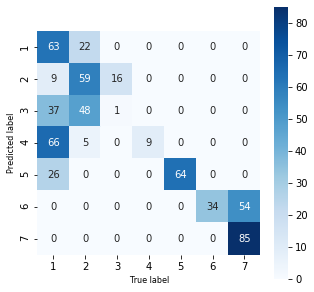

In [8]:
# 2.2 PCA and LDA transformations to reduce the dimensionality of depth images.
### Your code begins here ###
# Steps performed:
# 1) Preparation of training dataset with exercise labels the feature vector of depth camera data (1486,192,5)
# 2) Decompostion and tranformation of feature vector to pca and lda
##-------------------------------------------------------------------------------###
Cfeaturevector_train_depthcamera,labelsDepthexercise_train = featurevectorprep_dataset('dc', Training_dataset)
print("u",Cfeaturevector_train_depthcamera.shape)
applied_depth_pca_lda_traindataset,pca_Fit,lda_Fit,  means_Fit, stds_Fit = PCA_LDA_transformationwithtraindataset5subspacecomp(Cfeaturevector_train_depthcamera, labelsDepthexercise_train)
print("final shape",applied_depth_pca_lda_traindataset.shape) #training vector (1487, 30)

##-------------------------------------------------------------------------------###
# Steps performed:
# 3) Preparation of testing dataset with exercise labels the feature vector of depth camera data (598,125,3)
# 4) tranformation of feature vector to pca and lda 
Cfeaturevector_test_depthcamera,labelsDepthexercise_test = featurevectorprep_dataset('dc', Testing_dataset)
print("u",Cfeaturevector_test_depthcamera.shape)
applied_depth_pca_lda_testdataset= PCA_LDA_transformationwithtestdataset5subspacecomp(Cfeaturevector_test_depthcamera, means_Fit, stds_Fit, pca_Fit, lda_Fit)
print("final shape",applied_depth_pca_lda_testdataset.shape) #training vector (1487, 30)

##-------------------------------------------------------------------------------###
# Steps performed:
# 4) Predicting Classes using NN method 
# 5) Call method to print the f1_score and confusion matrix
predDepthExerciseClassesLabels = predictionClassesUsingNNmethod(applied_depth_pca_lda_testdataset,applied_depth_pca_lda_traindataset,labelsDepthexercise_train,'dc',5)
f1_score_confusion_matrix(labelsDepthexercise_test,predDepthExerciseClassesLabels, "NN method")



### Your code ends here ###

<h1> Analysis of results Task 2.2: </h1>
Compared to results obtained from the accelerometer trained model we can see that the it behaves opposite manner. The model when trained with depth camera dataset performed differently as with accelerometer data. In here, the worst perfomace is observed while predicted the sample of exercise 4 and exercise 3. However, the model works good in perdicting good amount of exercise 1 and 7 correctly, Maybe if the k can increased there might be chance of improving the accuracy of model overall. 

# 3. Feature extraction and feature-level fusion for multimodal classification

<a id='task3'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 3.</b>

Prepare new feature sets for each modality and combine them to single feature representation. Compare two classifiers from scikit-learn. Train classifiers using joint feature presentation. Evaluate and compare the result using testing dataset. Do the subtasks given as
<br>   
<br> 
<p> <b>3.1</b> Similar to task 2.1, calculate PCA for accelerometer, but choose now the 10 largest principal components as 10-dim feature vector for each window. In addition, for each window calculate mean and standard deviation of each three acc channels as statistical features, resulting 6-dimensional vector. Combine these to 36-dimensional final feature vector.</p>
<br>  
<p> <b>3.2</b> Similar to task 2.2, calculate the PCA for depth images using same setup, but now choose the 10 largest principal components as feature vector. Concatenate the image sequence forming 50-dimensional feature vector from each windowed example.</p>
<br> 
<p> <b>3.3</b> Form a joint feature presentation of features extracted in 3.1 and 3.2, resulting 86-dimensional feature vector for each example. Normalize data between 0-1 using the training dataset. Use support vector machine (SVM) with RBF-kernel and Gaussian naiveBayes classifier (use default parameter values for both classifiers). Train the classifiers and evaluate and compare classifiers on testset using confusion matrices and F1 scores.</p>
<br> 
Document your work, evaluate the results, and analyse the outcomes in each subtasks 3.1-3.3.
    
</div>

In [9]:
# 3.1 calculate PCA for accelerometer, 10 largest principal components as 10-dim feature vector for each window.

### Your code begins here ###
###  ---------------------------------------------------------------------------------------------------------- ###
# PCAfeature10dimensionwithtraindata:

## function PCAfeature10dimensionwithtraindata:
#   input: training dataset (for sensor acc )
#   returns: testing set vector scaled with mean and std and trqanformed with pca. 
#            (for accelometer: [matrix: 1468, 36] 10 pcas + 1 mean + 1 std of each 3 channels) 
#            
#   
##  This function: 
#                  1) Standardize and Scale to zero mean and unit variance return from training function
#                  2) performs decompostion of dataset over each channel by applying PCA and each window mean and stddeviation
#                  3) Combines and conatenate at each channel sequences to single (stats and pca feature)
#                  4) Conatenate all the channel to final vector
###  ---------------------------------------------------------------------------------------------------------- ###
def PCAfeature10dimensionwithtraindata(data):
    pcas = []
    means = [] 
    stdDeviations = []
    #print(len(data.shape))
        
    #This loop will go through each channel of accelerometer data axes. 
    for channel in range (len(data.shape)):

        #Step 1: Standardization of data with zero mean and unit variance
            # Normalizatrion of overall dataset at each channel
            means.append(np.mean(data[:,:,channel], axis=0))
            stdDeviations.append(np.std(data[:,:,channel], axis=0))
            # Data in Normalizated: Standardization to zero mean and unit variance.  
            data[:,:,channel] = (data[:,:,channel] - means[channel][None,:]/stdDeviations[channel][None,:])
        
        #Step 2: Decompostion of dataset over each channel by applying PCA
            #Applying PCA decomposition on each Channel
            pca_decomposition = PCA(n_components=10)
            pcas.append(pca_decomposition)
            datafit_pcadecompostion = pca_decomposition.fit_transform(data[:,:,channel])
            eachwindowmean = np.mean(data[:,:,channel], axis = 1)
            eachwindowmean = np.reshape(eachwindowmean,(-1,1))
            eachwindowStdDeviation = np.std(data[:,:,channel], axis = 1)
            eachwindowStdDeviation = np.reshape(eachwindowStdDeviation,(-1,1))
            
        #Step 3: Combining pca component with each window mean and standard deviation over all 3 channels 
            if channel == 0:
                combinepcadata = datafit_pcadecompostion
                combinedatastat = np.concatenate((eachwindowmean,eachwindowStdDeviation), axis = 1)
            else: 
                combinepcadata = np.concatenate((combinepcadata,datafit_pcadecompostion), axis = 1)
                #combinedatastat.append(np.concatenate((eachwindowmean,eachwindowStdDeviation), axis = 1))
                combinedatastat = np.concatenate((combinedatastat, np.concatenate((eachwindowmean,eachwindowStdDeviation), axis = 1)), axis = 1)
            
            #if len(completepcadata) != 1
            print("shape at each run pca:", combinepcadata.shape)
            print("shape at each run stats:", combinedatastat.shape)
            
    completepcastatdata = np.concatenate((combinepcadata, combinedatastat), axis = 1)
    return completepcastatdata, pcas, means, stdDeviations
###  ---------------------------------------------------------------------------------------------------------- ###
# ------------------------- End function------------------------------#
###  ---------------------------------------------------------------------------------------------------------- ###
# PCAfeaturewithtestdata:

## function PCAfeaturewithtestdata:
#   input: testing dataset (for sensor acc), means, standard deviations, pcas
#   returns: testing set vector scaled with mean and std and transformed with pca, lda. 
#            (for accelometer: [matrix: 598, 36] 10 pcas + 1 mean + 1 std of each 3 channels) 
#            
#   
##  This function: 
#                  1) Standardize and Scale to zero mean and unit variance return from training function
#                  2) Performs transformation of dataset over each channel by applying PCA and each window mean and stddeviation
#                  3) Combines and conatenate at each channel sequences to single (stats and pca feature)
#                  4) Conatenate all the channel to final vector
###  ---------------------------------------------------------------------------------------------------------- ###
def PCAfeaturewithtestdata(data,pcas,means,stdDeviations):
    
    #This loop will go through each channel of accelerometer data axes. 
    for channel in range (len(data.shape)):
        
        #Step 1: Standardization of data with zero mean and unit variance
            # Data in Normalizated: Standardization to zero mean and unit variance.  
            data[:,:,channel] = (data[:,:,channel] - means[channel][None,:]/stdDeviations[channel][None,:])
        
        #Step 2: Decompostion of dataset over each channel by applying PCA
            #Applying PCA decomposition on each Channel
            testdata_pcadecompostion = pcas[channel].transform(data[:,:,channel])
            eachwindowmean = np.mean(data[:,:,channel], axis = 1)
            eachwindowmean = np.reshape(eachwindowmean,(-1,1))
            eachwindowStdDeviation = np.std(data[:,:,channel], axis = 1)
            eachwindowStdDeviation = np.reshape(eachwindowStdDeviation,(-1,1))
       
        #Step 3: Combining pca component with each window mean and standard deviation over all 3 channels 
            if channel == 0:
                combinepcadata = testdata_pcadecompostion
                combinedatastat = np.concatenate((eachwindowmean,eachwindowStdDeviation), axis = 1)
            else: 
                combinepcadata = np.concatenate((combinepcadata,testdata_pcadecompostion), axis = 1)
                #combinedatastat.append(np.concatenate((eachwindowmean,eachwindowStdDeviation), axis = 1))
                combinedatastat = np.concatenate((combinedatastat, np.concatenate((eachwindowmean,eachwindowStdDeviation), axis = 1)), axis = 1)
            
            #if len(completepcadata) != 1
            print("shape at each run pca:", combinepcadata.shape)
            print("shape at each run stats:", combinedatastat.shape)
    
          
        
    completepcastatdata = np.concatenate((combinepcadata, combinedatastat), axis = 1)
    return completepcastatdata
###  ---------------------------------------------------------------------------------------------------------- ###
# ------------------------- End function------------------------------#
###  ---------------------------------------------------------------------------------------------------------- ###
# PCAfeature10dimensionwithoutstatstraindata:

## function PCAfeature10dimensionwithoutstatstraindata:
#   input: training dataset (for depth camera) 
#   returns: training set vector scaled with mean and std and trqanformed with only pca feature with 10 dimensions
#            (for depth camera: [1468, 50] 10 pcas  of each 5 channels)
#   
##  This function: 
#                  1) Standardize and Scale to zero mean and unit variance return from training function
#                  2) Decompostion of dataset over each channel by applying PCA
#                  3) Combines and conatenate at each channel sequences to single 
#                  4) Conatenate all the channel to final vector
###  ---------------------------------------------------------------------------------------------------------- ###

def PCAfeature10dimensionwithoutstatstraindata(data):
    pcas = []
    means = [] 
    stdDeviations = []
    #print(len(data.shape))
        
    #This loop will go through each channel of accelerometer data axes. 
    for channel in range (data.shape[2]):

        #Step 1: Standardization of data with zero mean and unit variance
            # Normalizatrion of overall dataset at each channel
            means.append(np.mean(data[:,:,channel], axis=0))
            stdDeviations.append(np.std(data[:,:,channel], axis=0))
            # Data in Normalizated: Standardization to zero mean and unit variance.  
            data[:,:,channel] = (data[:,:,channel] - means[channel][None,:]/stdDeviations[channel][None,:])
        
        #Step 2: Decompostion of dataset over each channel by applying PCA
            #Applying PCA decomposition on each Channel
            pca_decomposition = PCA(n_components=10)
            pcas.append(pca_decomposition)
            datafit_pcadecompostion = pca_decomposition.fit_transform(data[:,:,channel])
            
        #Step 3: Combining pca component with each window mean and standard deviation over all 3 channels 
            if channel == 0:
                combinepcadata = datafit_pcadecompostion
        
            else: 
                combinepcadata = np.concatenate((combinepcadata,datafit_pcadecompostion), axis = 1)
                #combinedatastat.append(np.concatenate((eachwindowmean,eachwindowStdDeviation), axis = 1))
                #combinedatastat = np.concatenate((combinedatastat, np.concatenate((eachwindowmean,eachwindowStdDeviation), axis = 1)), axis = 1)
            
            #if len(completepcadata) != 1
            print("shape at each run pca:", combinepcadata.shape)
            
            
    completepcastatdata = combinepcadata
    return completepcastatdata, pcas, means, stdDeviations
###  ---------------------------------------------------------------------------------------------------------- ###
#PCAfeaturewithoutstatstestdata:

## function PCAfeaturewithoutstatstestdata:
#   input: testing dataset (for sensor acc ), means, standard deviations, pcas
#   returns: testing set vector scaled with mean and std and transformed with only pca. 
#            (for depth camera: [598, 50] 10 pcas  of each 5 channels) 
#            
#   
##  This function: 
#                  1) Standardize and Scale to zero mean and unit variance return from training function
#                  2) Performs transformation of dataset over each channel by applying PCA
#                  3) Combines and conatenate at each channel sequences to single (stats and pca feature)
#                  4) Conatenate all the channel to final vector
###  ---------------------------------------------------------------------------------------------------------- ###
def PCAfeaturewithoutstatstestdata(data,pcas,means,stdDeviations):
    
    #This loop will go through each channel of accelerometer data axes. 
    for channel in range (data.shape[2]):
        
        #Step 1: Standardization of data with zero mean and unit variance
            # Data in Normalizated: Standardization to zero mean and unit variance.  
            data[:,:,channel] = (data[:,:,channel] - means[channel][None,:]/stdDeviations[channel][None,:])
        
        #Step 2: Decompostion of dataset over each channel by applying PCA
            #Applying PCA decomposition on each Channel
            testdata_pcadecompostion = pcas[channel].transform(data[:,:,channel])
            
       
        #Step 3: Combining pca component with each window mean and standard deviation over all 3 channels 
            if channel == 0:
                combinepcadata = testdata_pcadecompostion
            
            else: 
                combinepcadata = np.concatenate((combinepcadata,testdata_pcadecompostion), axis = 1)
    
            #if len(completepcadata) != 1
            print("shape at each run pca:", combinepcadata.shape)
        
    completepcastatdata = combinepcadata
    return completepcastatdata
###  ---------------------------------------------------------------------------------------------------------- ###
# ------------------------- End function------------------------------#

#  !------- End of Common Function used for both Task 3.1 and 3.2 ---------!


# Steps performed:
# 1) Preparation of training dataset with exercise labels the feature vector of acc data (1486,125,3)
# 2) Decompostion and tranformation of feature vector to pca and lda
##-------------------------------------------------------------------------------###
Cfeaturevector_train_accelometer,labelsexercise_train = featurevectorprep_dataset('acc', Training_dataset)
print("acc",Cfeaturevector_train_accelometer.shape)
pcafeaturewith10dimension_traindataset,pcas_fit,means_fit,stdDeviation_fit = PCAfeature10dimensionwithtraindata(Cfeaturevector_train_accelometer)
print("Final_trainvector_shape:",pcafeaturewith10dimension_traindataset.shape) #(1486, 36)
##-------------------------------------------------------------------------------###
# Steps performed:
# 3) Preparation of testing dataset with exercise labels the feature vector of acc data (598,125,3)
# 4) tranformation of feature vector to pca and lda 
##-------------------------------------------------------------------------------###
Cfeaturevector_test_accelometer,labelsexercise_test = featurevectorprep_dataset('acc', Testing_dataset)
print("acc",Cfeaturevector_test_accelometer.shape)
pcafeaturewith10dimension_testdataset = PCAfeaturewithtestdata(Cfeaturevector_test_accelometer,pcas_fit,means_fit,stdDeviation_fit)
print("Final_testvector_shape:",pcafeaturewith10dimension_testdataset.shape)  #(598, 36)
##-------------------------------------------------------------------------------###
### Your code ends here ###

acc (1486, 125, 3)
shape at each run pca: (1486, 10)
shape at each run stats: (1486, 2)
shape at each run pca: (1486, 20)
shape at each run stats: (1486, 4)
shape at each run pca: (1486, 30)
shape at each run stats: (1486, 6)
Final_trainvector_shape: (1486, 36)
acc (598, 125, 3)
shape at each run pca: (598, 10)
shape at each run stats: (598, 2)
shape at each run pca: (598, 20)
shape at each run stats: (598, 4)
shape at each run pca: (598, 30)
shape at each run stats: (598, 6)
Final_testvector_shape: (598, 36)


In [10]:
# 3.2
### Your code begins here ###
# Steps performed:
# 1) Preparation of training dataset with exercise labels the feature vector of depth camera data (1486,192,5)
# 2) Decompostion and tranformation of feature vector to only pca feature with 10 dimensions
##-------------------------------------------------------------------------------###
Cfeaturevector_train_depthcamera,labelsdcexercise_train = featurevectorprep_dataset('dc', Training_dataset)
print("dc",Cfeaturevector_train_depthcamera.shape)
pcafeaturewith10dimensiondepthcamera_traindataset,pcas_fit,means_fit,stdDeviation_fit = PCAfeature10dimensionwithoutstatstraindata(Cfeaturevector_train_depthcamera)
print("Finaldc_trainvector_shape:",pcafeaturewith10dimensiondepthcamera_traindataset.shape)
# Steps performed:
# 3) Preparation of testing dataset with exercise labels the feature vector of depth camera data (598,192,5)
# 4) tranformation of feature vector to pca features only
Cfeaturevector_test_depthcamera,labelsdcexercise_test = featurevectorprep_dataset('dc', Testing_dataset)
print("dc",Cfeaturevector_test_depthcamera.shape)
pcafeaturewith10dimensiondepthcamera_testdataset = PCAfeaturewithoutstatstestdata(Cfeaturevector_test_depthcamera,pcas_fit,means_fit,stdDeviation_fit)
print("Finaldc_testvector_shape:",pcafeaturewith10dimensiondepthcamera_testdataset.shape)
### Your code ends here ###

dc (1486, 192, 5)
shape at each run pca: (1486, 10)
shape at each run pca: (1486, 20)
shape at each run pca: (1486, 30)
shape at each run pca: (1486, 40)
shape at each run pca: (1486, 50)
Finaldc_trainvector_shape: (1486, 50)
dc (598, 192, 5)
shape at each run pca: (598, 10)
shape at each run pca: (598, 20)
shape at each run pca: (598, 30)
shape at each run pca: (598, 40)
shape at each run pca: (598, 50)
Finaldc_testvector_shape: (598, 50)


Combined train feature shape: (1486, 86)
Combined test feature shape: (598, 86)
normalizated train feature of acc_dc :  (1486, 86)
normalizated test feature of acc_dc :  (598, 86)
F1 score of prediction  Gaussian_NB : 0.11506114536417567
-----------------------------------------------------------------
confusion Martix of Gaussian_NB:
-----------------------------------------------------------------


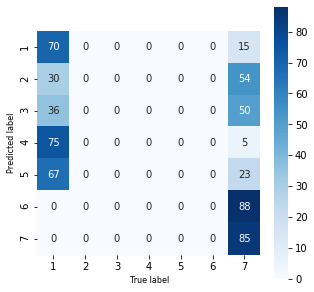

In [11]:
# 3.3 Form a joint feature presentation of features extracted in 3.1 and 3.2,
#resulting 86-dimensional feature vector for each example

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import seaborn as sns

### Your code begins here ###
###  ---------------------------------------------------------------------------------------------------------- ###
# Normalization
## function Normalization:
#   input: dataset(training or testing)
#   return: normalized vector
#   
##  This function performs normalization of provided dataset using min-max norm. 
#  
###  ---------------------------------------------------------------------------------------------------------- ###
def Normalization(featureDataset):
    minf = np.min(featureDataset, axis = 0)
    maxf = np.max(featureDataset, axis = 0)
    norm_f = featureDataset-minf[None,:]/maxf - minf[None,:]
    return norm_f
###  ---------------------------------------------------------------------------------------------------------- ###
# ------------------------- End function------------------------------#
###  ---------------------------------------------------------------------------------------------------------- ###
# Support_Vector_Classifier

## function Support_Vector_Classifier:
#   input: training dataset (combined acc and dc feature vector),testing dataset(combined acc and dc feature vector), 
#                                                                               train labels
#   returns: predictedclasses labels. 
#   
##  This function return the predicted class labels after fiting using svc
#  
###  ---------------------------------------------------------------------------------------------------------- ###
def Support_Vector_Classifier(train, test, labeltrain):
    svc_rbf = SVC(kernel = 'rbf')
    model_svc = svc_rbf.fit(train,labeltrain)
    predclasses = model_svc.predict(test)
    
    return predclasses
###  ---------------------------------------------------------------------------------------------------------- ###
# ------------------------- End function------------------------------#
###  ---------------------------------------------------------------------------------------------------------- ###
# Gaussian_NB

## function Gaussian_NB:
#   input: training dataset (combined acc and dc feature vector),testing dataset(combined acc and dc feature vector), 
#                                                                            train labels
#   returns: predictedclasses labels. 
#   
##  This function return the predicted class labels after fiting using Gaussian_NB. 
#  
###  ---------------------------------------------------------------------------------------------------------- ###
def Gaussian_NB(traingb, testgb, labeltrain):
    GNB = GaussianNB()
    model_gNB = GNB.fit(traingb,labeltrain)
    predclasses = model_gNB.predict(testgb)
    
    return predclasses
##-------------------------------------------------------------------------------###
# ------------------------- End function------------------------------#
#  !------- End of Common Function used for both Task 3.3 ---------!

###  ---------------------------------------------------------------------------------------------------------- ###

# Steps performed:
# 1) Preparation of combined feature (acc and depth camera) vector of training dataset 
# 2) Preparation of combined feature (acc and depth camera) vector of training dataset 
##-------------------------------------------------------------------------------###
feature_accelometer_dc_combine_train = np.concatenate((pcafeaturewith10dimension_traindataset
                                                ,pcafeaturewith10dimensiondepthcamera_traindataset), axis = 1)
feature_accelometer_dc_combine_test = np.concatenate((pcafeaturewith10dimension_testdataset
                                                      ,pcafeaturewith10dimensiondepthcamera_testdataset), axis = 1)
print("Combined train feature shape:",feature_accelometer_dc_combine_train.shape)
print("Combined test feature shape:",feature_accelometer_dc_combine_test.shape)
##-------------------------------------------------------------------------------###

# Steps performed:
# 1) perform normalization of combined feature (acc and depth camera) vector of training dataset (function call)
# 2) perform normalization of combined feature (acc and depth camera) vector of training dataset (function call)
##-------------------------------------------------------------------------------###
norm_feature_accelometer_dc_combine_train = Normalization(feature_accelometer_dc_combine_train)
norm_feature_accelometer_dc_combine_test = Normalization(feature_accelometer_dc_combine_test)
print("normalizated train feature of acc_dc : ", norm_feature_accelometer_dc_combine_train.shape)
print("normalizated test feature of acc_dc : ", norm_feature_accelometer_dc_combine_test.shape)

###  ---------------------------------------------------------------------------------------------------------- ###

# Steps performed:
# 4) Predicting Classes using svc and rbf
# 5) Call method to print the f1_score and confusion matrix
###  ---------------------------------------------------------------------------------------------------------- ###
#svc_class_predict = Support_Vector_Classifier(norm_feature_accelometer_dc_combine_train, norm_feature_accelometer_dc_combine_test, labelsexercise_train)
#f1_score_confusion_matrix(labelsexercise_test,svc_class_predict, "SVC")
###  ---------------------------------------------------------------------------------------------------------- ###

# Steps performed:
# 4) Predicting Classes using Gaussian_NB
# 5) Call method to print the f1_score and confusion matrix
###  ---------------------------------------------------------------------------------------------------------- ###
Gaussian_NB_predict = Gaussian_NB(norm_feature_accelometer_dc_combine_train, norm_feature_accelometer_dc_combine_test, labelsexercise_train)
f1_score_confusion_matrix(labelsexercise_test,Gaussian_NB_predict, "Gaussian_NB")
###  ---------------------------------------------------------------------------------------------------------- ### 

### Your code ends here ###

<h1>Analysis of results Task 3.3: </h1>
SVC performed better than previous approach, where as, for GNB they performed worst. Its implies the combination of acc with depth camera is a good option to improve the accuracy of the model. The SVC predicts good number samples in every exercise class except for exercise 6. Sometime the tunning of hyper parameter of svc classifier can result in improving the accuarcy of prediction model.  

# 4. Decision-level fusion for multimodal classification

<a id='task4'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 4.</b>

Use features calculated for each modality in task 3. Choose base classifier for each modality from scikit-learn. Train classifiers for each modality feature presentations separately and combine the outputs in decision level. Evaluate and compare the result on testing dataset. Do the subtasks given as
<br>
<br> 
<p> <b>4.1</b> Use base classifiers of support vector machine (SVM) with RBF-kernel and AdaBoost classifier (with random_state=0). 
Normalize data between 0-1 using the training dataset. Train the base classifiers by tuning the model parameters (<i>C</i> parameter and RBF-kernel <i>gamma</i> in SVM as well as <i>n_estimators</i> and <i>learning_rate</i> in Adaboost) using 10-fold cross-validation on training dataset to find optimal set of parameters (hint: use GridSearchCV from scikit-learn). For grid search use the following values $C = [0.1, 1.0, 10.0, 100.0]$, $gamma=[0.1, 0.25, 0.5, 0.75, 1.0, 2.0]$, $n\_estimators = [50, 100, 500, 1000]$, and $learning\_rate = [0.1, 0.25, 0.5, 0.75,1.0]$. Choose the best parameters and train the classifiers for each modality on whole training dataset. Is there a possibility that classifiers will overfit to training data using this parameter selection strategy? If so, why? </p>
<br>
<p> <b>4.2</b> Predict probabilistic outputs of each trained classifier for both modalities using the test set. </p>
<br>
<p> <b>4.3</b> Combine the probabilistic outputs of different modalities by fixed classification rules: max, min, prod, and sum. Evaluate, compare, and analyse the final combined results using confusion matrices and F1 scores. Show results for each base classifier combinations (i.e., $SVM_{acc}+SVM_{depth}$, $AdaBoost_{acc}+AdaBoost_{depth}$, $SVM_{acc}+AdaBoost_{depth}$, $AdaBoost_{acc}+SVM_{depth}$)</p>
<br>
Document your work, evaluate the results, and analyse the outcomes in each subtasks 4.1-4.3.
    
</div>

In [ ]:
# 4.1
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

### Your code begins here ###

#Finding best hyper parameter's values for acc training dataset
#Adaboost
train_Accelermoter = norm_feature_accelometer_dc_combine_train[:,:36]
AdaAcceleration = AdaBoostClassifier(random_state=0)
Ada_parameters = {'n_estimators': [50, 100, 500, 1000], 'learning_rate':[0.1,0.25,0.5,0.75,1.0]}
clf = GridSearchCV(AdaAcceleration, Ada_parameters, cv=10, scoring='f1_macro', n_jobs=-1)
clf.fit(train_Accelermoter,labelsexercise_train)
print("ada for acc",clf.best_estimator_.get_params())
#SVC
Svc_rbf = SVC(kernel = 'rbf')
Svc_parameters = {'C': [0.1,1.0,10.0,100.0], 'gamma':[0.1,0.25,0.5,0.75,1.0,2.0]}
svc_clf = GridSearchCV(Svc_rbf, Svc_parameters, cv=10, scoring='f1_macro', n_jobs=-1)
svc_clf.fit(train_Accelermoter,labelsexercise_train)
print("svc for acc",svc_clf.best_estimator_.get_params())

    
#Finding best hyper parameters values for depth training dataset
#Adaboost
train_Depthcamera = norm_feature_accelometer_dc_combine_train[:,36:]
AdaDepthcamera = AdaBoostClassifier(random_state=0)
Ada_parameters = {'n_estimators': [50, 100, 500, 1000], 'learning_rate':[0.1,0.25,0.5,0.75,1.0]}
clf = GridSearchCV(AdaDepthcamera, Ada_parameters, cv=10, scoring='f1_macro', n_jobs=-1)
clf.fit(train_Depthcamera,labelsexercise_train)
print("ada for dc",clf.best_estimator_.get_params())
#SVC
Svc_rbf = SVC(kernel = 'rbf')
Svc_parameters = {'C': [0.1,1.0,10.0,100.0], 'gamma':[0.1,0.25,0.5,0.75,1.0,2.0]}
svc_clf = GridSearchCV(Svc_rbf, Svc_parameters, cv=10, scoring='f1_macro', n_jobs=-1)
svc_clf.fit(train_Depthcamera,labelsexercise_train)
print("svc for dc",svc_clf.best_estimator_.get_params())

# Training with keeping the probabilistic values for task 4.2 
#Step 1: AdaBoost 
#AdaBoost with obtained best tunned hyper parameter using grid search
#Adaboost model trained on Accelerometer dataset and Depth camera dataset
Adaboost_Accelerometer = AdaBoostClassifier(random_state=0, n_estimators=1000, learning_rate=0.75)
Adaboost_Accelerometer.fit(train_Accelermoter,labelsexercise_train)
Adaboost_DepthCamera = AdaBoostClassifier(random_state=0, n_estimators=1000, learning_rate=0.5)
Adaboost_DepthCamera.fit(train_Depthcamera,labelsexercise_train)

#Step 2: SVC
#SVC with obtained best tunned hyper parameter using grid search
#SVC model trained on Accelerometer dataset and Depth camera dataset
SVC_Accelerometer = SVC(C=100, gamma=0.1, probability=True)
SVC_Accelerometer.fit(train_Accelermoter,labelsexercise_train)
SVC_DepthCamera = SVC(C=100, gamma=0.1, probability=True)
SVC_DepthCamera.fit(train_Depthcamera,labelsexercise_train)


### Your code ends here ###

ada for acc {'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 0.75, 'n_estimators': 1000, 'random_state': 0}
svc for acc {'C': 100.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.1, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [ ]:
# 4.2 Predict the probabilities
### Your code begins here ###
# Predicting the probablities of each model for acc and depth camera
#Step:
# 1) Tesing set for nomarlized dataset
# 2) predicts the probabilities of trained models 

#Test vector for accelemoter data 
test_Accelermoter = norm_feature_accelometer_dc_combine_test[:,:36]

#Probs Ada and svc for accelemoter data 
Ada_probability_accelerometer = Adaboost_Accelerometer.predict_proba(test_Accelermoter)
print(Ada_probability_accelerometer.shape)
Svc_probability_accelerometer = SVC_Accelerometer.predict_proba(test_Accelermoter)
print(Svc_probability_accelerometer.shape)


#Test vector for accelemoter data 
test_depthCamera = norm_feature_accelometer_dc_combine_test[:,36:]
#Probs Ada and svc for depthCamera data 
Ada_probability_depthCamera = Adaboost_DepthCamera.predict_proba(test_depthCamera)
print(Ada_probability_depthCamera.shape)
Svc_probability_depthCamera  = SVC_DepthCamera.predict_proba(test_depthCamera)
print(Svc_probability_depthCamera.shape)

### Your code ends here ###

In [ ]:
# 4.3

### Your code begins here ###

### Your code ends here ###

# 5. Bonus task: Multimodal biometric identification of persons (optional)

<a id='task5'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 5.</b>

Can you build a classifier that recognizes the person who is performing the exercise? Use same 10 person dataset and split it so that first 25% of each long exercise sequence is used for training and rest 75% of each sequence is used for testing the classifier. Use same 5 second windowing with 3 seconds overlap to prepare the examples. Note that, now the person identity is the class label instead of exercise type. Max. 10 points are given but you can earn points from partial solution, as well.
<br> 
<br> 
<p> <b>5.1</b> Build a classifier to identify persons based on the features and one of the models given in task 4 (max. 5 points).</p>
<br> 
<p> <b>5.2</b> Can you build your own solution (using new features, new classification model or different fusion approaches) to beat the approach in Task 5.1 ? (max. 5 points) </p>
<br>  
Document your work. Evaluate and compare the results using confusion matrix and F1 score.

</div>

In [ ]:
# 5.1

### Your code begins here ###

### Your code ends here ###

In [ ]:
# 5.2

### Your code begins here ###

### Your code ends here ###